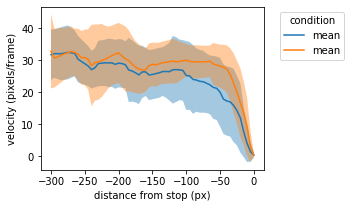

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dfwt = pd.read_csv('/Users/jkgerdts/Downloads/wt_inter.csv')
df44 = pd.read_csv('/Users/jkgerdts/Downloads/cd44_inter.csv')

def plot_binned_df(df,bins,ax):
    
    # make placeholder dataframe with every bin for every track:
    numtracks = len(df['TID'].unique())
    TIDs = []
    for TID in df['TID'].unique():
        for x in [TID]*len(bins):
            TIDs.append(x)
            
    # round every d_off value in the dataframe to one of the bins
    df['bins'] = [min(bins, key=lambda x:abs(x-z)) for z in df['d_off']]

    
    dfbin = pd.DataFrame({'bins':bins*numtracks,'TID':TIDs})
    
    # merge the dataframes, set bins as index, pivot so that each column is a TID and values are "v"
    df = dfbin.merge(df,on=['bins','TID'],how='outer')
    df = df.pivot_table(index='bins',columns='TID',values='v')
    df = df.interpolate(method='index')

    df = df.unstack().reset_index().groupby('bins').agg({0:['mean','std','count']})
    
    # note values "v" are in an unnamed columnn 0 because of pivoting and unpivoting

    means = df[0]['mean']
    sems = df[0]['std']
    means.plot(ax=ax)
    plt.sca(ax)
    plt.fill_between(means.index,means+sems,means-sems,alpha=0.4)
    return df

f,ax=plt.subplots(figsize=[4,3])
bins = [x for x in range(-300,5,5)]

df1 = plot_binned_df(dfwt,bins,ax)
df2 = plot_binned_df(df44,bins,ax)
ax.set_xlabel('distance from stop (px)')
ax.set_ylabel('velocity (pixels/frame)')
plt.legend(title='condition', bbox_to_anchor=(1.05, 1), loc='upper left')




######plt.savefig('2021 06-03 slowdown v vs dist.pdf',bbox_inches='tight')